# Exploratory Data Analysis for Greater London Authority

### Import Libraries 

In [2]:
#Import the basic libraries
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date

#Import the basic visualisations
import seaborn as sns
import matplotlib.pyplot as plt

### Import DataSets 

In [3]:
#Load the dataset
Central_London = pd.read_csv("Central London.csv")
Inner_London = pd.read_csv("Inner London.csv")
Outer_London = pd.read_csv("Outer London.csv")

C:\Users\Akira\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Akira\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Data Exploration

In [4]:
# Understanding the shape and nature of the data
Central_London.head(2)

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,NaN,NaN,NaN


In [5]:
#Showcasing the datatypes
Central_London.dtypes

Survey wave (calendar quarter)     object
Equivalent financial quarter       object
Site ID                            object
Location                           object
Survey date                        object
Weather                            object
Time                               object
Period                             object
Direction                          object
Start hour                        float64
Start minute                      float64
Number of private cycles          float64
Number of cycle hire bikes        float64
Total cycles                      float64
Unnamed: 14                       float64
Unnamed: 15                       float64
Unnamed: 16                       float64
dtype: object

In [6]:
# Understanding the shape and nature of the data
Inner_London.head(2)

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0
1,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0


In [7]:
# Understanding the shape and nature of the data
Outer_London.head(2)

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3


# London Crime Rate vs Cycling Rates

In [8]:
#Load up London crime data
Borough_crime = pd.read_csv("MPS Borough Level Crime (most recent 24 months).csv")

Borough_crime.head()

,MajorText,MinorText,LookUp_BoroughName,202007,202008,202009,202010,202011,202012,202101,...,202109,202110,202111,202112,202201,202202,202203,202204,202205,202206
0,Arson and Criminal Damage,Arson,Barking and Dagenham,4,6,2,7,4,2,4,...,5,7,6,1,4,4,3,5,5,5
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,123,114,116,120,100,110,100,...,110,126,109,116,126,110,116,125,120,140
2,Burglary,Burglary Business and Community,Barking and Dagenham,28,23,32,20,18,24,21,...,27,37,20,14,19,29,30,17,17,23
3,Burglary,Domestic Burglary,Barking and Dagenham,72,63,54,68,90,91,70,...,62,82,87,91,81,67,76,82,75,55
4,Drug Offences,Drug Trafficking,Barking and Dagenham,21,10,12,14,18,13,12,...,16,16,9,10,15,11,18,13,12,14


In [9]:
#Explore the data types
Borough_crime.dtypes

MajorText             object
MinorText             object
LookUp_BoroughName    object
202007                 int64
202008                 int64
202009                 int64
202010                 int64
202011                 int64
202012                 int64
202101                 int64
202102                 int64
202103                 int64
202104                 int64
202105                 int64
202106                 int64
202107                 int64
202108                 int64
202109                 int64
202110                 int64
202111                 int64
202112                 int64
202201                 int64
202202                 int64
202203                 int64
202204                 int64
202205                 int64
202206                 int64
dtype: object

In [11]:
#Change the names of certain dataframe columns
Borough_crime.rename(columns = {'LookUp_BoroughName':'BoroughName', 'MajorText' : 'MajorCrime','MinorText' : 'MinorCrime'}, inplace = True)

In [12]:
#Showcasing top of the dataframe
Borough_crime.head()

,MajorCrime,MinorCrime,BoroughName,202007,202008,202009,202010,202011,202012,202101,...,202109,202110,202111,202112,202201,202202,202203,202204,202205,202206
0,Arson and Criminal Damage,Arson,Barking and Dagenham,4,6,2,7,4,2,4,...,5,7,6,1,4,4,3,5,5,5
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,123,114,116,120,100,110,100,...,110,126,109,116,126,110,116,125,120,140
2,Burglary,Burglary Business and Community,Barking and Dagenham,28,23,32,20,18,24,21,...,27,37,20,14,19,29,30,17,17,23
3,Burglary,Domestic Burglary,Barking and Dagenham,72,63,54,68,90,91,70,...,62,82,87,91,81,67,76,82,75,55
4,Drug Offences,Drug Trafficking,Barking and Dagenham,21,10,12,14,18,13,12,...,16,16,9,10,15,11,18,13,12,14


<AxesSubplot:xlabel='count', ylabel='MajorCrime'>

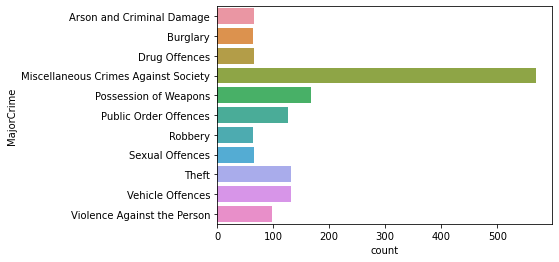

In [13]:
# create a countplot with Seaborn for total MajorCrime rows in dataframe
sns.countplot(y="MajorCrime", data=Borough_crime)

The bar chart belows the total number of all reported crimes across London boroughs from July 2020 to June 2022

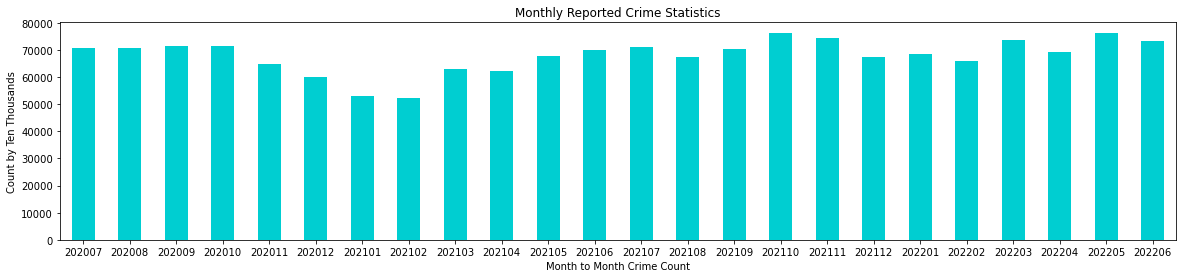

In [14]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)

Borough_crime[Borough_crime.columns[3:27]].sum().plot.bar(rot=0, color='DarkTurquoise')
plt.xlabel("Month to Month Crime Count")
plt.ylabel('Count by Ten Thousands')
plt.title("Monthly Reported Crime Statistics")
plt.show()

The barchart below shows the total major crimes for each borough, however the data for each major crime appears to be overlapping. 

<AxesSubplot:xlabel='BoroughName', ylabel='Count'>

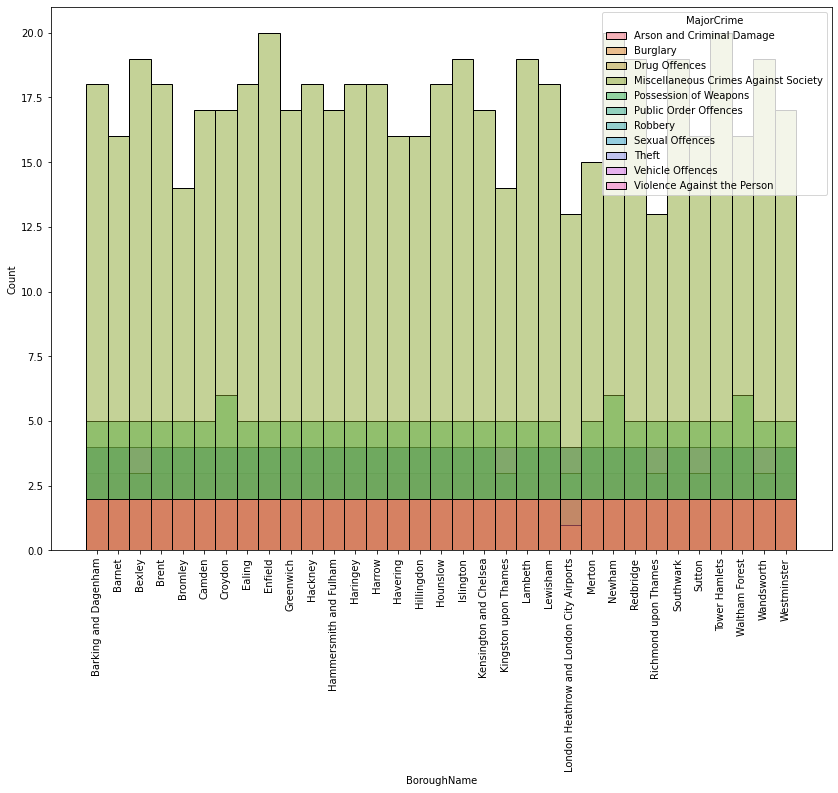

In [15]:
plt.figure(figsize=(14, 10))
plt.xticks(rotation=90)
sns.histplot(data=Borough_crime, x="BoroughName", hue="MajorCrime", binwidth=5)#


Stacked barplot below shows the reported crimes broken down into Major crimes by month. Currently unable to remove legend

<Figure size 1008x720 with 0 Axes>

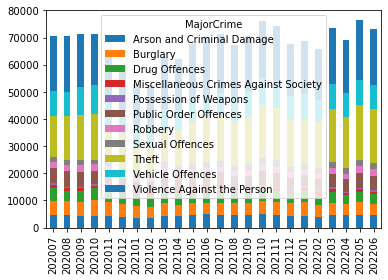

<Figure size 1008x720 with 0 Axes>

In [18]:
# stacked barplots with Pandas

Borough_crime.groupby("MajorCrime")[["202007", "202008", "202009", "202010", "202011", "202012", "202101", "202102", "202103", "202104", "202105", "202106", "202107", "202108", "202109", "202110", "202111", "202112", "202201","202202", "202203", "202204", "202205", "202206"]].sum().T.plot.bar(stacked=True)
plt.figure(figsize=(14, 10))

In [33]:
#Create a Dataframe showing only bicycle theft data across London boroughs
biketheft_df = Borough_crime.loc[(Borough_crime['MinorCrime'] == 'Bicycle Theft'), ['MajorCrime', 'MinorCrime','BoroughName',"202007", "202008", "202009", "202010", "202011", "202012", "202101", "202102", "202103", "202104", "202105", "202106", "202107", "202108", "202109", "202110", "202111", "202112", "202201","202202", "202203", "202204", "202205", "202206"]]
biketheft_df

,MajorCrime,MinorCrime,BoroughName,202007,202008,202009,202010,202011,202012,202101,...,202109,202110,202111,202112,202201,202202,202203,202204,202205,202206
37,Theft,Bicycle Theft,Barking and Dagenham,26,18,28,16,14,4,5,...,23,18,14,10,10,10,13,13,15,14
83,Theft,Bicycle Theft,Barnet,28,25,35,31,32,19,27,...,28,31,23,20,13,21,23,31,37,12
131,Theft,Bicycle Theft,Bexley,7,5,15,5,7,3,5,...,17,16,17,5,5,4,8,5,7,5
179,Theft,Bicycle Theft,Brent,69,46,40,28,26,20,20,...,41,36,28,24,33,30,29,42,34,45
223,Theft,Bicycle Theft,Bromley,17,20,13,16,19,6,7,...,17,13,17,14,8,9,12,16,10,16
270,Theft,Bicycle Theft,Camden,192,179,146,178,145,83,68,...,112,123,122,66,80,71,105,148,114,139
318,Theft,Bicycle Theft,Croydon,27,35,25,39,24,17,25,...,15,16,8,9,6,4,16,14,23,24
366,Theft,Bicycle Theft,Ealing,52,44,116,108,66,36,21,...,41,48,30,26,35,28,29,39,46,35
416,Theft,Bicycle Theft,Enfield,28,37,41,23,22,12,8,...,22,16,18,10,10,7,14,13,9,13
463,Theft,Bicycle Theft,Greenwich,70,75,69,48,29,19,22,...,67,57,49,23,49,43,33,38,54,52


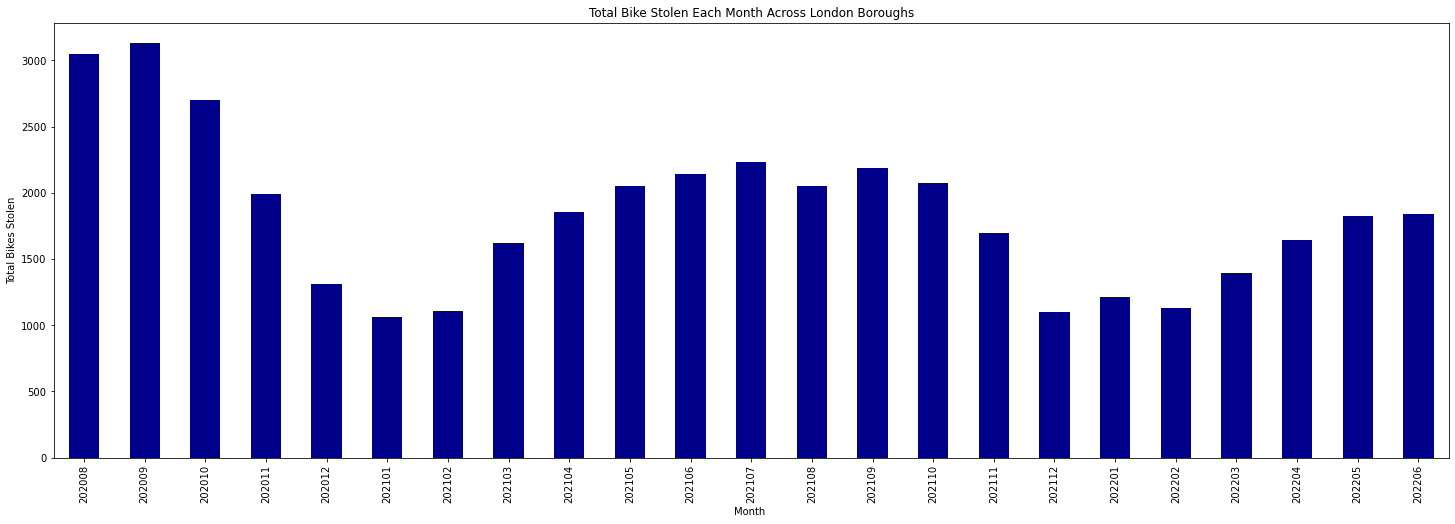

<Figure size 432x288 with 0 Axes>

In [24]:
#Barchart to total the bike thefts across all London boroughs throughout the data collection period
plt.figure(figsize=(25,8))
biketheft_df[biketheft_df.columns[4:27]].sum().plot.bar(rot=0, color='DarkBlue')
plt.xlabel("Month ")
plt.ylabel('Total Bikes Stolen')
plt.title("Total Bike Stolen Each Month Across London Boroughs")
plt.xticks(rotation=90)
plt.show()

plt.savefig('Total Bike Stolen Each Month Across London Boroughs.png')

In [ ]:
#Attempting to make a stacked barchart using 3 different variables: Month, Borough and Count of Bicycle thefts

In [25]:
# stacked barplots with Pandas

mycode = {'202007': 1, '202008': 2, '202009': 3, '202010': 4, '202011': 5, '202012': 6, '202101': 7, '202102': 8,
              '202103': 9, '202104': 10, '202105': 11, '202106': 12, '202107': 13, '202108': 14, '202109': 15,
             '202110': 16, '202111': 17, '202112': 18, '202201': 19, '202202': 20, '202203': 21, '202204': 22,
             '202205': 23, '202206': 24}
                                


In [26]:
for i in biketheft_df.columns:
    biketheft_df[i] = biketheft_df[i].replace(mycode)
    
biketheft_df.head()

,MajorCrime,MinorCrime,BoroughName,202007,202008,202009,202010,202011,202012,202101,...,202109,202110,202111,202112,202201,202202,202203,202204,202205,202206
37,Theft,Bicycle Theft,Barking and Dagenham,26,18,28,16,14,4,5,...,23,18,14,10,10,10,13,13,15,14
83,Theft,Bicycle Theft,Barnet,28,25,35,31,32,19,27,...,28,31,23,20,13,21,23,31,37,12
131,Theft,Bicycle Theft,Bexley,7,5,15,5,7,3,5,...,17,16,17,5,5,4,8,5,7,5
179,Theft,Bicycle Theft,Brent,69,46,40,28,26,20,20,...,41,36,28,24,33,30,29,42,34,45
223,Theft,Bicycle Theft,Bromley,17,20,13,16,19,6,7,...,17,13,17,14,8,9,12,16,10,16


In [28]:
myCoding = {'Barking and Dagenham': 1, 'Barnet': 2, 'Bexley': 3, 'Brent': 4, 'Bromley': 5, 'Camden':6, 'Croydon': 7, 
            'Ealing': 8, 'Enfield': 9, 'Greenwich': 10, 'Hackney': 11, 'Hammersmith and Fulham': 12, 'Haringey': 13,
            'Harrow': 14, 'Havering': 15, 'Hillingdon': 16, 'Hounslow': 17, 'Islington': 18, 'Kensington and Chelsea': 19,
           'Kingston Upon Thames': 20, 'Lambeth': 21, 'Lewisham': 22, 'London Heathrow and London City Airports': 23,
           'Merton': 24, 'Newham': 25, 'Redbridge': 26, 'Richmond upon Thames': 27, 'Southwark': 28, 'Sutton': 29, 
           'Tower Hamlets': 30, 'Waltham Forest': 31, 'Wandsworth': 32, 'Westminster':33}

In [30]:
for i in biketheft_df.columns:
    biketheft_df[i] = biketheft_df[i].replace(myCoding)
    
biketheft_df.head()

,MajorCrime,MinorCrime,BoroughName,202007,202008,202009,202010,202011,202012,202101,...,202109,202110,202111,202112,202201,202202,202203,202204,202205,202206
37,Theft,Bicycle Theft,1,26,18,28,16,14,4,5,...,23,18,14,10,10,10,13,13,15,14
83,Theft,Bicycle Theft,2,28,25,35,31,32,19,27,...,28,31,23,20,13,21,23,31,37,12
131,Theft,Bicycle Theft,3,7,5,15,5,7,3,5,...,17,16,17,5,5,4,8,5,7,5
179,Theft,Bicycle Theft,4,69,46,40,28,26,20,20,...,41,36,28,24,33,30,29,42,34,45
223,Theft,Bicycle Theft,5,17,20,13,16,19,6,7,...,17,13,17,14,8,9,12,16,10,16


The bar chart below shows the number of bicycle thefts across London Boroughs in July 2020

<AxesSubplot:xlabel='BoroughName'>

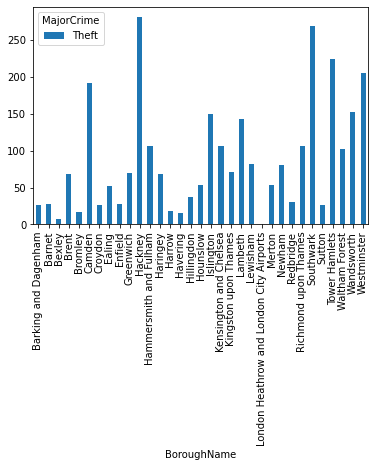

In [47]:
(biketheft_df.pivot_table(index= 'BoroughName', columns='MajorCrime', values='202007',
                aggfunc='sum', fill_value=0)
   .plot.bar(stacked=True)
)


The barcharts below indicate an attempt to showcase all bicycle thefts across London boroughs broken down into years 2020, 2021 and 2022 but the charts were found not to be suitably readable.

<AxesSubplot:xlabel='BoroughName'>

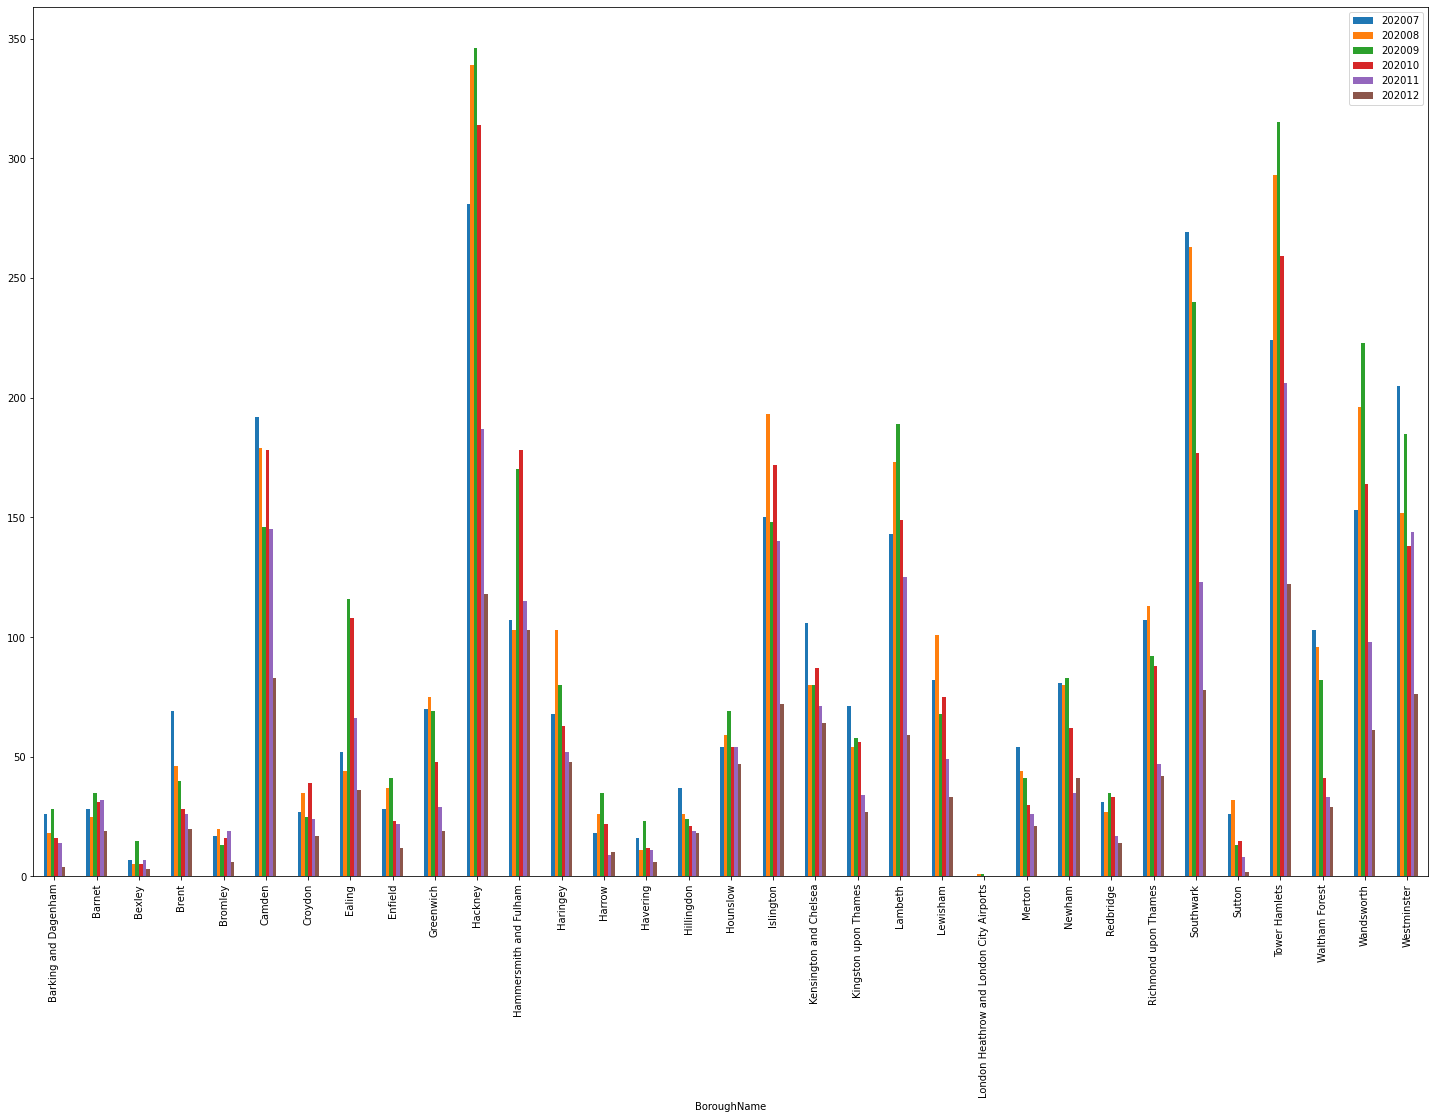

In [57]:
# plot the dataframe
#Showcasing data for 2020
biketheft_df.plot(x="BoroughName", y=["202007", "202008", "202009", "202010","202011", "202012"], kind="bar", figsize=(25, 16))

<AxesSubplot:xlabel='BoroughName'>

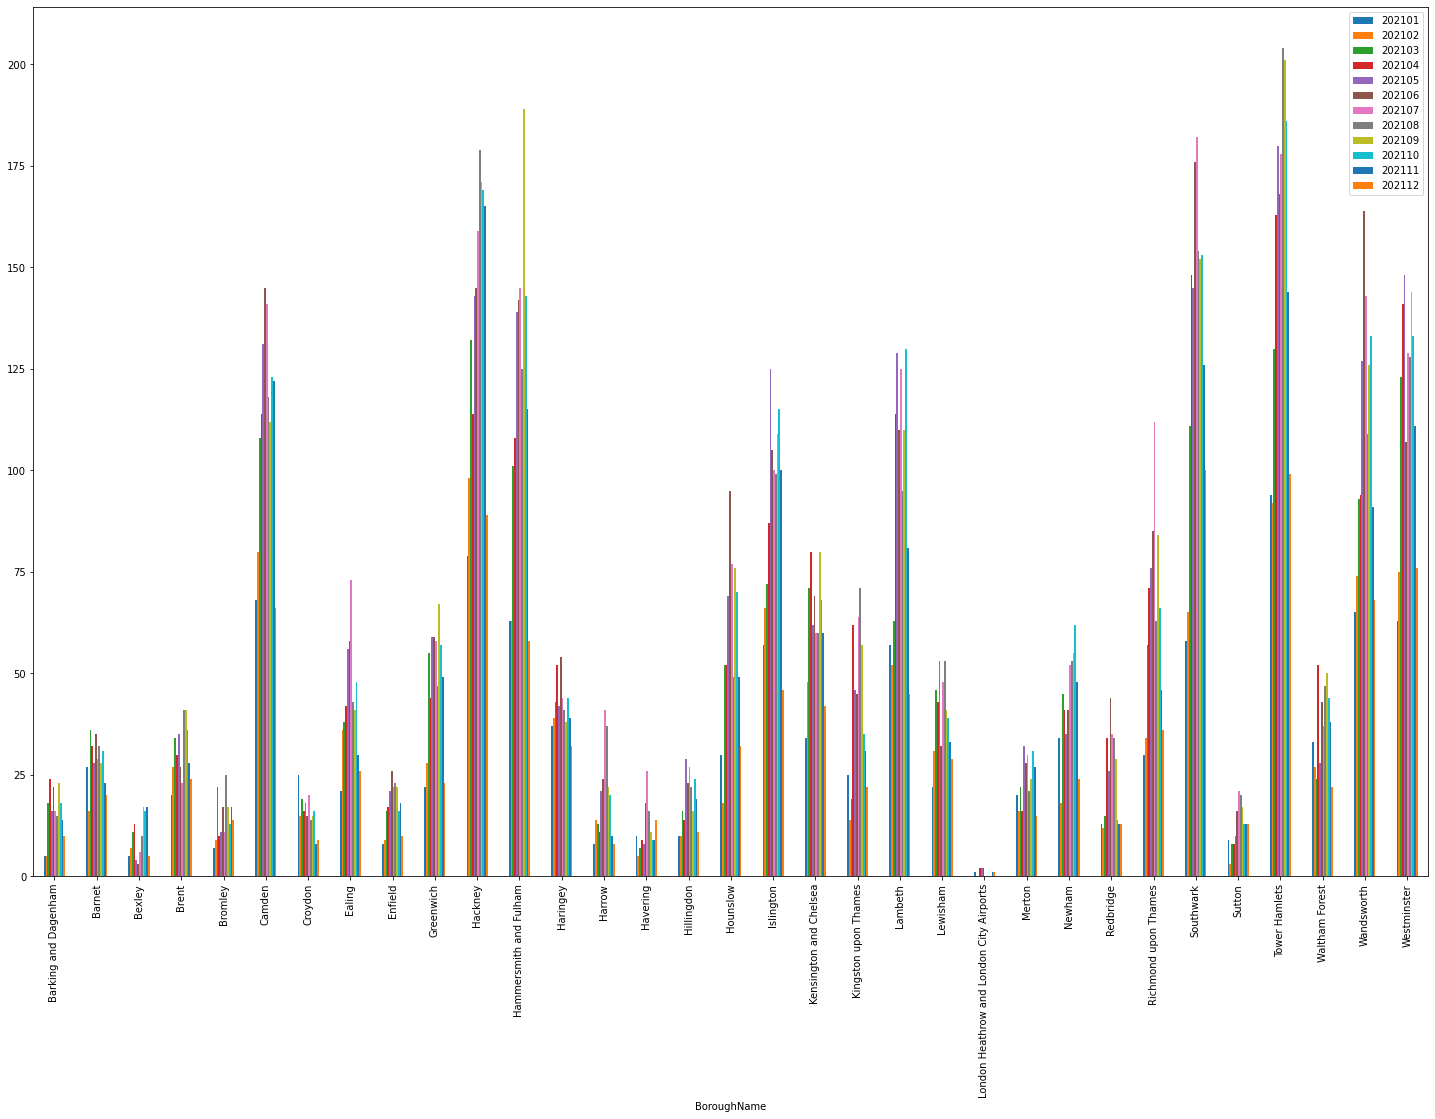

In [56]:
# plot the dataframe
#Showcasing data for 2021
biketheft_df.plot(x="BoroughName", y=["202101", "202102", "202103", "202104", "202105", "202106", "202107", "202108", "202109", "202110", "202111", "202112"], kind="bar", figsize=(25, 16))

<AxesSubplot:xlabel='BoroughName'>

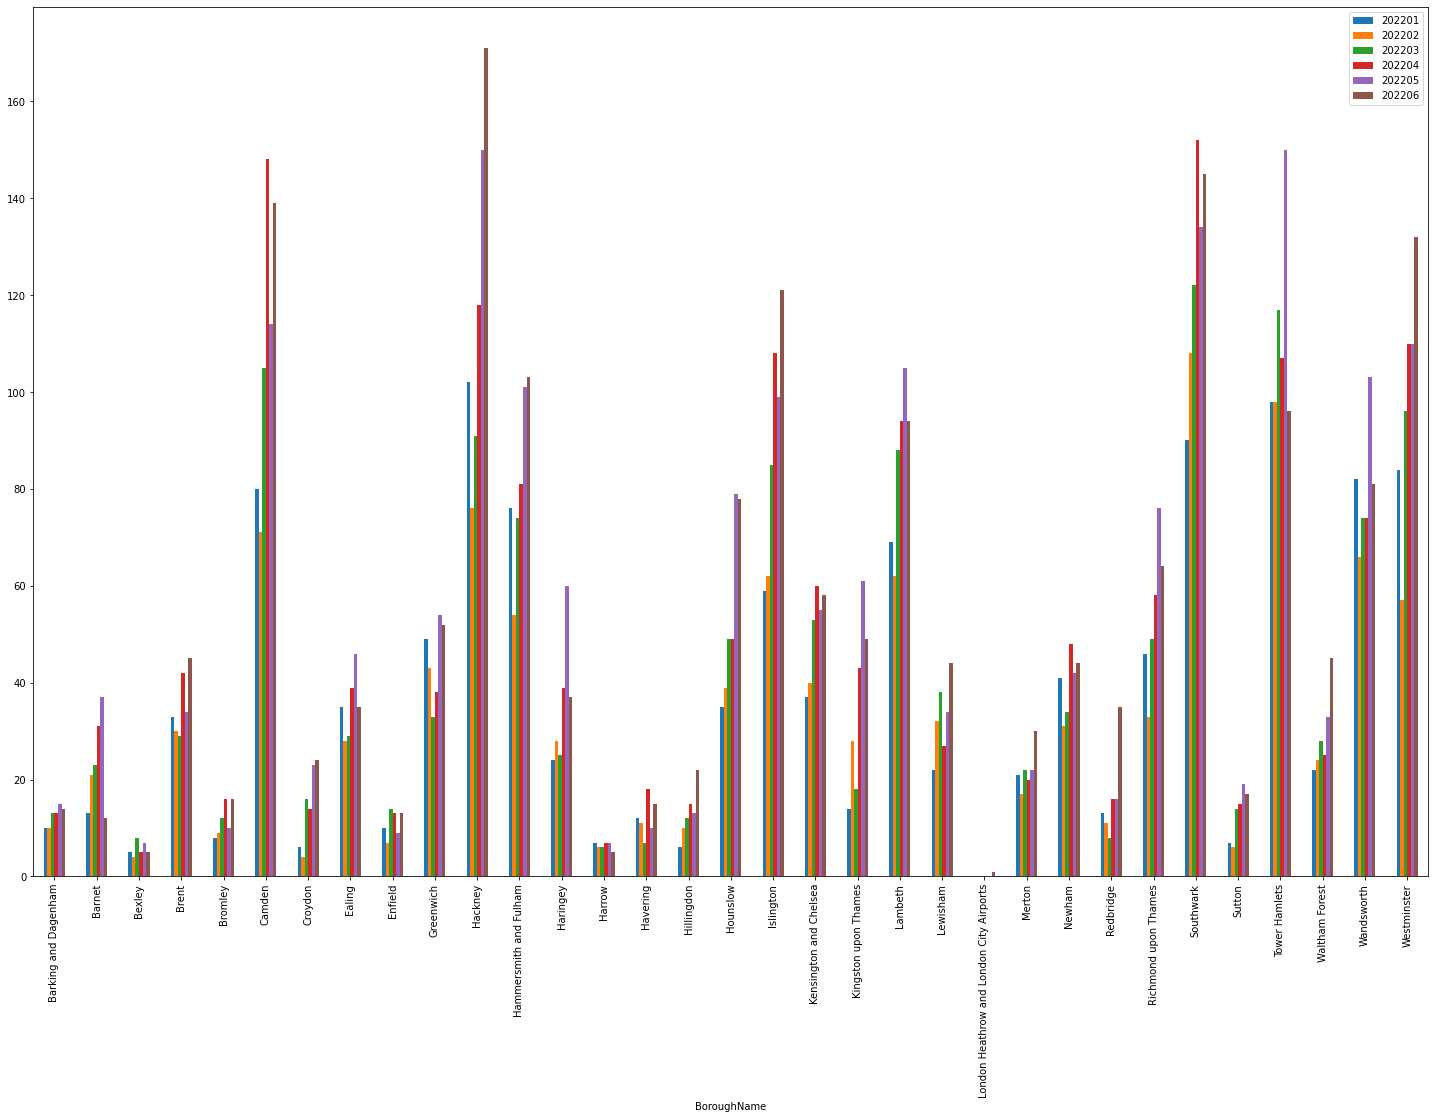

In [55]:
#Showcasing data for 2022
biketheft_df.plot(x="BoroughName", y=[ "202201","202202", "202203", "202204", "202205", "202206"], kind="bar", figsize=(25, 16))